<a href="https://colab.research.google.com/github/Mahdi-Abdollahii/Dusty-Stellar-Sources-Classification/blob/main/Model_Evaluation_Smote.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading data from GitHub and installing package


The project is hosted on GitHub. Get a copy by running:

In [ ]:
!git clone https://github.com/Mahdi-Abdollahii/Dusty-Stellar-Sources-Classification.git

Cloning into 'Dusty-Stellar-Sources-Classification'...
remote: Enumerating objects: 404, done.
remote: Counting objects: 100% (124/124), done.
remote: Compressing objects: 100% (74/74), done.
remote: Total 404 (delta 72), reused 85 (delta 49), pack-reused 280
Receiving objects: 100% (404/404), 58.95 MiB | 14.66 MiB/s, done.
Resolving deltas: 100% (210/210), done.


In [ ]:
!pip install pyunpack

In [ ]:
!pip install patool

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.0/96.0 kB 1.4 MB/s eta 0:00:00


# Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io, requests, zipfile
from zipfile import ZipFile
import seaborn as sns
from sklearn.metrics import confusion_matrix , accuracy_score , recall_score , precision_score , f1_score , classification_report
from pyunpack import Archive
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#https://blog.finxter.com/how-to-plot-sklearn-confusion-matrix-with-labels/
import numpy as np

def plot_confusion_matrix(cm,
                          target_names,
                          title = 'Confusion matrix',
                          cmap=None,
                          normalize=True,
                          size = [16,12],
                          file_name = False,
                          color_bar = True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    color_bar:    if Ture, plot the color bar on the right hand side
                  if false, Do not plot that

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    if cmap is None:
        cmap = plt.get_cmap('Greens')

    plt.figure(figsize=(size[0],size[1]))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.ylabel('True label' , fontsize = 16 )
    plt.xlabel('Predicted label', fontsize = 16 )

    if title is not None:
      plt.title(title ,fontsize = 16 )

    if color_bar == True :
      plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)




    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            #if cm[i,j]>= 0.01 : # if you want remove 0.1>
                plt.text(j, i, "{:0.2f}".format(cm[i, j]),
                        horizontalalignment="center",
                        color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    if file_name != False :
        plt.savefig(file_name , dpi=300)
    plt.show()

# Data Pre

In [ ]:
df = pd.read_csv("/content/Dusty-Stellar-Sources-Classification/Data/Preprocessed_Data.csv")

In [ ]:
df

,RAdeg,DEdeg,Umag,Bmag,Vmag,Imag,Jmag,Hmag,Ksmag,[3.6],[4.5],[5.8],[8.0],[24],SpClass,GeneralClass
0,69.338100,-70.579000,NaN,-0.485,-2.258,-4.690,-6.112,-7.032,-7.329,-7.6101,-7.7148,-7.8326,-8.0159,-8.8792,OAGB,DSS
1,71.613100,-68.796300,1.307,1.954,0.325,-2.250,-3.502,-5.238,-6.803,-8.6656,-9.3873,-9.8100,-10.2429,-11.1944,CAGB,DSS
2,71.827700,-69.705700,-1.052,-3.148,-5.010,-7.333,-8.420,-9.248,-9.515,-9.6540,-9.4759,-9.6545,-9.7627,-10.9685,RSG,DSS
3,72.157300,-69.393600,NaN,3.178,2.261,1.023,NaN,NaN,-5.600,-8.1534,-9.0379,-9.8431,-10.6543,-13.6554,YSO,DSS
4,72.393200,-69.097000,-5.412,-5.208,-5.460,-6.105,-6.339,-6.739,-7.281,-8.4329,-8.9152,-9.2952,-9.9431,-11.3106,OAGB,DSS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,14.527078,-72.068717,-0.619,-0.522,-1.027,-1.728,-2.806,-3.214,-3.766,-5.5270,-5.6600,-8.0320,-9.6220,-15.6450,YSO,DSS
614,14.488457,-72.654396,-1.593,-0.817,-1.266,-1.993,-3.270,-3.795,-4.912,-6.6860,-7.2730,-8.2610,-9.2260,-15.2890,YSO,DSS
615,14.027887,-72.789808,-1.605,-1.218,-1.578,-2.070,-2.708,-3.195,-3.745,-5.4810,-5.9750,-7.7430,-9.1680,-15.3400,YSO,DSS
616,16.039817,-72.837738,-2.357,-3.880,-5.665,NaN,-8.645,-9.325,-9.593,-9.6990,-9.7110,-9.9220,-10.0500,-10.8040,OAGB,DSS


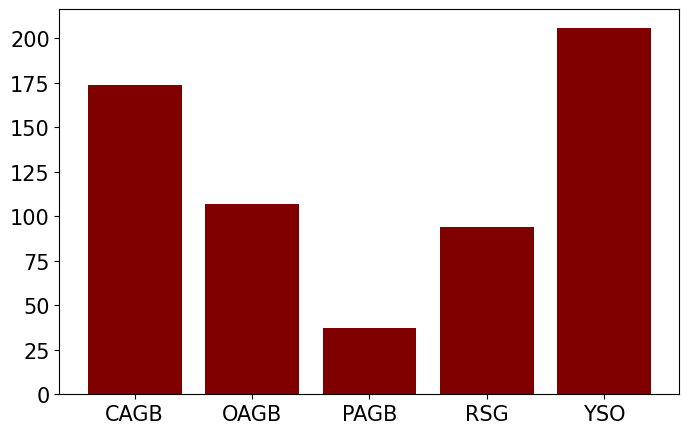

In [ ]:
n = df.pivot_table(index=['SpClass'], aggfunc='size').index
s = list(df.pivot_table(index=['SpClass'], aggfunc='size'))

fig=plt.figure(figsize=(8,5))
line = plt.bar(n  , s  , color = 'maroon' , log  = False )

plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)

plt.show()
fig.savefig('SPclass_hist.pdf',dpi=400)

In [ ]:
from sklearn import preprocessing

LE = preprocessing.LabelEncoder()
Y = LE.fit_transform(df['SpClass'])
Y = pd.DataFrame(Y)
Y.columns = ['EY']

print('Ordinal Encoding:')
LE.inverse_transform(np.arange(0,5))

Ordinal Encoding:


array(['CAGB', 'OAGB', 'PAGB', 'RSG', 'YSO'], dtype=object)

Here we use an algorithm named IterativeImputer to fill the blank (NaN) data points.

A strategy for imputing missing values by modeling each feature with missing values as a function of other features in a round-robin fashion.

A more sophisticated approach is to use the IterativeImputer class, which models each feature with missing values as a function of other features, and uses that estimate for imputation. It does so in an iterated round-robin fashion: at each step, a feature column is designated as output y and the other feature columns are treated as inputs X. A regressor is fit on (X, y) for known y. Then, the regressor is used to predict the missing values of y. This is done for each feature in an iterative fashion, and then is repeated for max_iter imputation rounds. The results of the final imputation round are returned.

For more information : https://scikit-learn.org/stable/modules/impute.html#iterative-imputer

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp = IterativeImputer( random_state= 0 )
df[df.columns[2:-2]] = imp.fit_transform(df[df.columns[2:-2]])

In [ ]:
X = df[df.columns[2:-2]]
Y = Y['EY']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X , Y , test_size= 0.10 , random_state = 1234 )
print('X_train : ' , X_train.shape)
print('X_test : ' , X_test.shape)
print('Y_train : ' , Y_train.shape)
print('Y_test : ' , Y_test.shape)

X_train :  (556, 12)
X_test :  (62, 12)
Y_train :  (556,)
Y_test :  (62,)


# Loading Smote data

In [ ]:
AX_train = pd.read_csv("/content/Dusty-Stellar-Sources-Classification/Data/Smote_train_data.csv", index_col = 'Unnamed: 0' )

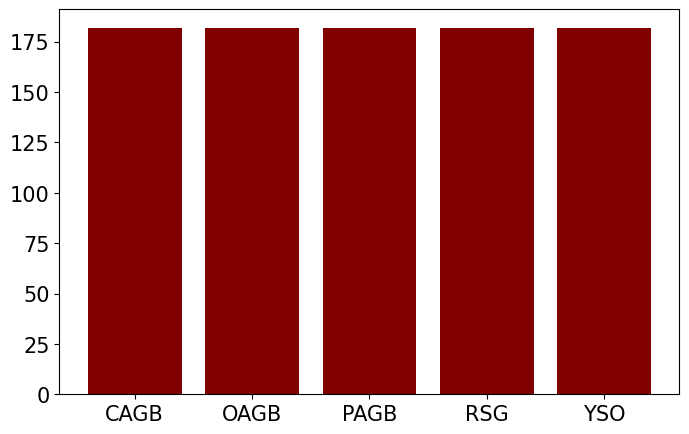

In [ ]:
n = AX_train.pivot_table(index=['SpClass'], aggfunc='size').index
s_smote = list(AX_train.pivot_table(index=['SpClass'], aggfunc='size'))

fig=plt.figure(figsize=(8,5))
line = plt.bar(n  , s_smote  , color = 'maroon' , log  = False )

plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)

plt.show()
fig.savefig('SPclass_hist_smote.pdf',dpi=400)

In [ ]:
AY_train = AX_train[AX_train.columns[-1]]
AX_train = AX_train[AX_train.columns[:-1]]

In [ ]:
AX_train

,Umag,Bmag,Vmag,Imag,Jmag,Hmag,Ksmag,[3.6],[4.5],[5.8],[8.0],[24]
0,1.530726,2.290877,2.030281,1.322575,-1.270366,-3.720000,-6.273000,-9.549100,-10.638100,-11.548700,-12.361100,-14.051200
1,0.743193,0.429722,-0.931832,-3.083696,-4.720000,-6.328000,-7.511000,-9.243500,-9.446900,-9.627400,-9.936700,-10.164200
2,-2.143000,-4.152000,-5.754000,-8.482341,-9.731000,-10.538000,-10.889000,-11.079800,-11.290500,-11.590300,-11.940100,-14.032500
3,1.062959,0.684000,-1.580000,-4.169000,-6.148000,-7.302000,-7.843000,-8.905000,-9.348000,-9.968000,-11.118000,-13.737000
4,3.545071,3.713175,3.000741,1.709237,-2.010000,-5.705000,-8.118000,-10.247900,-10.938500,-11.517500,-12.320200,-15.532800
...,...,...,...,...,...,...,...,...,...,...,...,...
905,-1.391919,-2.742472,-4.754200,-8.405221,-9.991516,-10.794044,-11.156882,-11.387639,-11.324801,-11.602175,-12.052643,-13.499699
906,-1.241394,-2.685118,-4.541671,-7.832585,-9.352168,-10.131844,-10.491731,-10.672484,-10.763330,-11.044856,-11.581226,-14.101070
907,-2.311114,-4.283740,-6.173842,-8.050712,-9.207597,-10.027737,-10.322183,-10.514686,-10.355136,-10.568460,-10.749449,-12.590472
908,-2.684739,-4.151989,-6.087281,-8.939284,-10.034320,-10.805870,-11.180529,-11.585195,-11.607933,-11.903274,-12.353384,-14.488073


In [ ]:
AY_train = LE.transform(AY_train)

In [ ]:
AY_train

array([0, 0, 3, 1, 1, 4, 4, 0, 1, 1, 0, 4, 1, 0, 3, 4, 2, 3, 0, 4, 2, 0,
       4, 3, 0, 4, 2, 4, 4, 3, 4, 0, 4, 3, 2, 4, 3, 0, 4, 4, 0, 4, 1, 4,
       1, 0, 1, 0, 4, 4, 3, 4, 0, 4, 3, 0, 0, 1, 0, 0, 1, 0, 0, 0, 4, 1,
       3, 2, 3, 2, 1, 0, 1, 0, 0, 3, 3, 0, 3, 3, 1, 0, 4, 2, 4, 1, 0, 0,
       1, 0, 4, 3, 4, 4, 4, 4, 1, 0, 1, 3, 4, 4, 3, 0, 1, 4, 3, 4, 4, 4,
       0, 4, 3, 4, 4, 0, 0, 3, 3, 4, 1, 0, 3, 0, 0, 1, 4, 4, 0, 0, 1, 1,
       4, 2, 1, 0, 4, 1, 1, 4, 0, 4, 3, 4, 2, 0, 0, 4, 2, 1, 4, 4, 4, 1,
       0, 0, 4, 3, 3, 4, 2, 3, 0, 4, 0, 2, 4, 4, 0, 1, 0, 2, 3, 0, 2, 0,
       4, 0, 4, 4, 0, 0, 4, 1, 0, 3, 4, 3, 3, 3, 3, 4, 1, 1, 0, 4, 0, 0,
       4, 4, 1, 2, 4, 4, 0, 0, 3, 0, 1, 4, 0, 1, 1, 0, 4, 1, 4, 4, 0, 3,
       2, 1, 4, 4, 0, 0, 2, 4, 4, 4, 1, 3, 1, 4, 0, 4, 1, 3, 3, 4, 3, 3,
       0, 0, 0, 3, 0, 4, 0, 0, 3, 0, 4, 4, 4, 3, 1, 4, 1, 0, 4, 2, 0, 4,
       0, 4, 4, 1, 4, 1, 0, 1, 2, 1, 0, 3, 0, 0, 4, 4, 0, 4, 3, 1, 0, 4,
       1, 4, 4, 0, 3, 3, 4, 3, 4, 1, 0, 4, 1, 4, 3,

In the next cell, we use the Min Max scaler to scale data between 0 and 1. This algorithm helps models in training.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
MMS = MinMaxScaler()
MMS.fit(AX_train)
AX_train = MMS.transform(AX_train)
X_test = MMS.transform(X_test)

(array([18.,  0., 11.,  0.,  0.,  1.,  0.,  8.,  0., 24.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

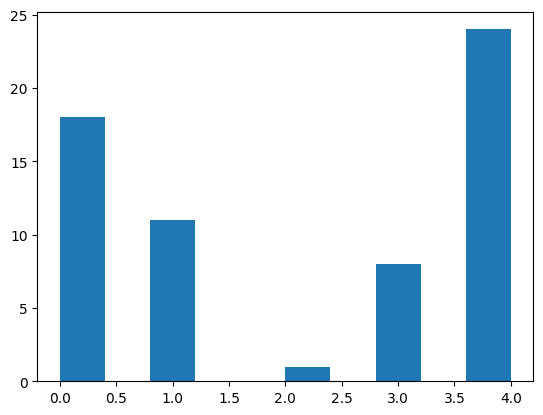

In [ ]:
plt.hist(Y_test)

In [ ]:
X_train = AX_train
Y_train = AY_train
print('X_train : ' , X_train.shape)
print('X_test : ' , X_test.shape)
print('Y_train : ' , Y_train.shape)
print('Y_test : ' , Y_test.shape)

X_train :  (910, 12)
X_test :  (62, 12)
Y_train :  (910,)
Y_test :  (62,)


# PRF

In [ ]:
!git clone https://github.com/ireis/PRF.git

Cloning into 'PRF'...
remote: Enumerating objects: 226, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 226 (delta 4), reused 6 (delta 2), pack-reused 211
Receiving objects: 100% (226/226), 15.34 MiB | 16.11 MiB/s, done.
Resolving deltas: 100% (114/114), done.


In [ ]:
from PRF import PRF

In [ ]:
prf_cls = PRF.prf(n_estimators=10, bootstrap=True, keep_proba=0.01)
prf_cls.fit( X=X_train, y=np.array(Y_train))
Y_pred = prf_cls.predict(X_test)
print('PRF: {}'.format(prf_cls.score(X=X_test, y=np.array(Y_test))))

PRF: 0.8709677419354839


              precision    recall  f1-score   support

           0       0.95      1.00      0.97        18
           1       0.78      0.64      0.70        11
           2       0.33      1.00      0.50         1
           3       0.73      1.00      0.84         8
           4       1.00      0.83      0.91        24

    accuracy                           0.87        62
   macro avg       0.76      0.89      0.78        62
weighted avg       0.90      0.87      0.88        62



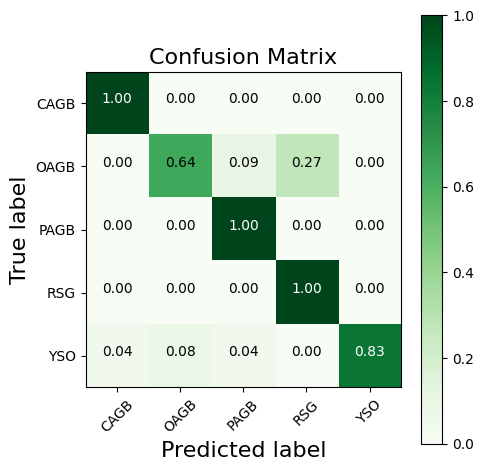

In [ ]:
print(classification_report( Y_test , Y_pred ))
cm = confusion_matrix(Y_test , Y_pred )
plot_confusion_matrix(cm = cm ,
                      normalize    = True,
                      target_names = ['CAGB', 'OAGB', 'PAGB', 'RSG', 'YSO'] ,
                      title  = "Confusion Matrix",
                      file_name = 'CSV.pdf',
                      size = (5,5))

In [ ]:
import pickle
model_name = 'PRF-S-001-10-87-0'
filename = model_name + '.sav'
pickle.dump(prf_cls, open(filename, 'wb'))

In [ ]:
prf_cls = PRF.prf(n_estimators=10, bootstrap=True, keep_proba=0.1)
prf_cls.fit( X=X_train, y=np.array(Y_train))
Y_pred = prf_cls.predict(X_test)
print('PRF: {}'.format(prf_cls.score(X=X_test, y=np.array(Y_test))))

PRF: 0.8387096774193549


              precision    recall  f1-score   support

           0       0.95      1.00      0.97        18
           1       0.70      0.64      0.67        11
           2       0.25      1.00      0.40         1
           3       0.70      0.88      0.78         8
           4       1.00      0.79      0.88        24

    accuracy                           0.84        62
   macro avg       0.72      0.86      0.74        62
weighted avg       0.88      0.84      0.85        62



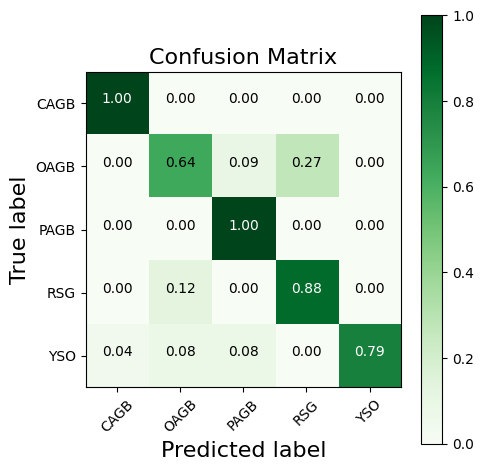

In [ ]:
print(classification_report( Y_test , Y_pred ))
cm = confusion_matrix(Y_test , Y_pred )
plot_confusion_matrix(cm = cm ,
                      normalize    = True,
                      target_names = ['CAGB', 'OAGB', 'PAGB', 'RSG', 'YSO'] ,
                      title  = "Confusion Matrix",
                      file_name = 'CSV.pdf',
                      size = (5,5))

In [ ]:
import pickle
model_name = 'PRF-S-01-10-89-0'
filename = model_name + '.sav'
pickle.dump(prf_cls, open(filename, 'wb'))

In [ ]:
prf_cls = PRF.prf(n_estimators=100, bootstrap=True, keep_proba=0.1)
prf_cls.fit( X=X_train, y=np.array(Y_train))
Y_pred = prf_cls.predict(X_test)
print('PRF: {}'.format(prf_cls.score(X=X_test, y=np.array(Y_test))))

PRF: 0.8548387096774194


              precision    recall  f1-score   support

           0       0.95      1.00      0.97        18
           1       0.70      0.64      0.67        11
           2       0.33      1.00      0.50         1
           3       0.70      0.88      0.78         8
           4       1.00      0.83      0.91        24

    accuracy                           0.85        62
   macro avg       0.74      0.87      0.77        62
weighted avg       0.88      0.85      0.86        62



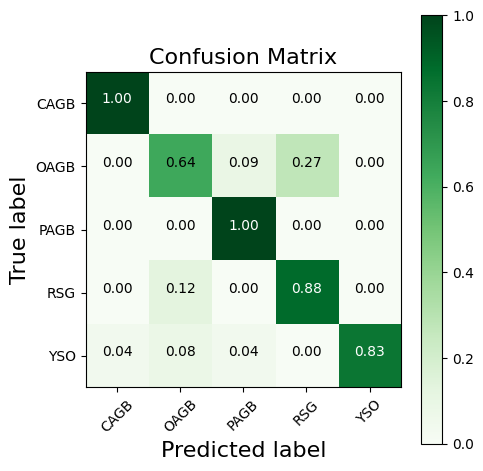

In [ ]:
print(classification_report( Y_test , Y_pred ))
cm = confusion_matrix(Y_test , Y_pred )
plot_confusion_matrix(cm = cm ,
                      normalize    = True,
                      target_names = ['CAGB', 'OAGB', 'PAGB', 'RSG', 'YSO'] ,
                      title  = "Confusion Matrix",
                      file_name = 'CSV.pdf',
                      size = (5,5))

In [ ]:
import pickle
model_name = 'PRF-S-01-100-87-0'
filename = model_name + '.sav'
pickle.dump(prf_cls, open(filename, 'wb'))

In [ ]:
prf_cls = PRF.prf(n_estimators=10, bootstrap=True, keep_proba=0.5)
prf_cls.fit( X=X_train, y=np.array(Y_train))
Y_pred = prf_cls.predict(X_test)
print('PRF: {}'.format(prf_cls.score(X=X_test, y=np.array(Y_test))))

PRF: 0.8870967741935484


              precision    recall  f1-score   support

           0       0.86      1.00      0.92        18
           1       1.00      0.64      0.78        11
           2       0.50      1.00      0.67         1
           3       0.70      0.88      0.78         8
           4       1.00      0.92      0.96        24

    accuracy                           0.89        62
   macro avg       0.81      0.89      0.82        62
weighted avg       0.91      0.89      0.89        62



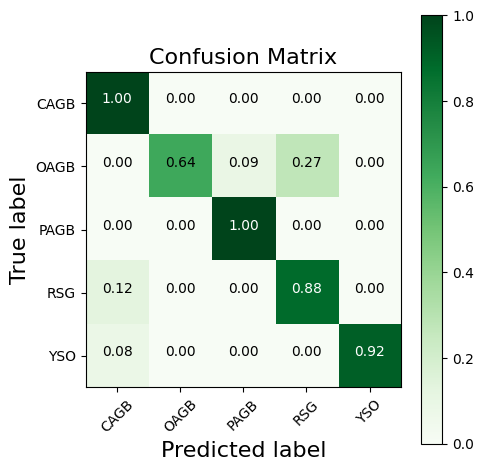

In [ ]:
print(classification_report( Y_test , Y_pred ))
cm = confusion_matrix(Y_test , Y_pred )
plot_confusion_matrix(cm = cm ,
                      normalize    = True,
                      target_names = ['CAGB', 'OAGB', 'PAGB', 'RSG', 'YSO'] ,
                      title  = "Confusion Matrix",
                      file_name = 'CSV.pdf',
                      size = (5,5))

In [ ]:
import pickle
model_name = 'PRF-S-05-10-89-0'
filename = model_name + '.sav'
pickle.dump(prf_cls, open(filename, 'wb'))

In [ ]:
prf_cls = PRF.prf(n_estimators=10, bootstrap=True, keep_proba=0.3)
prf_cls.fit( X=X_train, y=np.array(Y_train))
Y_pred = prf_cls.predict(X_test)
print('PRF: {}'.format(prf_cls.score(X=X_test, y=np.array(Y_test))))

In [ ]:
print(classification_report( Y_test , Y_pred ))
cm = confusion_matrix(Y_test , Y_pred )
plot_confusion_matrix(cm = cm ,
                      normalize    = True,
                      target_names = ['CAGB', 'OAGB', 'PAGB', 'RSG', 'YSO'] ,
                      title  = "Confusion Matrix",
                      file_name = 'CSV.pdf',
                      size = (5,5))

In [ ]:
import pickle
model_name = 'PRF-S-03-10-87-0'
filename = model_name + '.sav'
pickle.dump(prf_cls, open(filename, 'wb'))

In [ ]:
prf_cls = PRF.prf(n_estimators=50, bootstrap=True, keep_proba=0.8)
prf_cls.fit( X=X_train, y=np.array(Y_train))
Y_pred = prf_cls.predict(X_test)
print('PRF: {}'.format(prf_cls.score(X=X_test, y=np.array(Y_test))))

In [ ]:
print(classification_report( Y_test , Y_pred ))
cm = confusion_matrix(Y_test , Y_pred )
plot_confusion_matrix(cm = cm ,
                      normalize    = True,
                      target_names = ['CAGB', 'OAGB', 'PAGB', 'RSG', 'YSO'] ,
                      title  = "Confusion Matrix",
                      file_name = 'CSV.pdf',
                      size = (5,5))

In [ ]:
import pickle
model_name = 'PRF-S-08-50-85-0'
filename = model_name + '.sav'
pickle.dump(prf_cls, open(filename, 'wb'))

In [ ]:
prf_cls = PRF.prf(n_estimators=10, bootstrap=True, keep_proba=0.8)
prf_cls.fit( X=X_train, y=np.array(Y_train))
Y_pred = prf_cls.predict(X_test)
print('PRF: {}'.format(prf_cls.score(X=X_test, y=np.array(Y_test))))

In [ ]:
print(classification_report( Y_test , Y_pred ))
cm = confusion_matrix(Y_test , Y_pred )
plot_confusion_matrix(cm = cm ,
                      normalize    = True,
                      target_names = ['CAGB', 'OAGB', 'PAGB', 'RSG', 'YSO'] ,
                      title  = "Confusion Matrix",
                      file_name = 'CSV.jpg',
                      size = (5,5))

In [ ]:
import pickle
model_name = 'PRF-S-08-10-85-0'
filename = model_name + '.sav'
pickle.dump(prf_cls, open(filename, 'wb'))

In [ ]:
Address_directory = ''
Models = ['PRF-S-001-10-87-0', 'PRF-S-01-10-89-0', 'PRF-S-01-100-87-0',
          'PRF-S-03-10-87-0', 'PRF-S-05-10-89-0', 'PRF-S-08-50-85-0','PRF-S-08-10-85-0']

In [ ]:
for i in Models:
  model_name = i
  filename = Address_directory + model_name + '.sav'
  loaded_model = pickle.load(open(filename, 'rb'))
  Y_pred_save_model = loaded_model.predict(X_test)
  Model_name = i.split('-')[0] + i.split('-')[1]
  keep_proba = i.split('-')[2].split('0')[1]
  n_stimator = i.split('-')[3]
  print('======================================================')
  print('Model_name: ' + Model_name)
  print('Parameters: ')
  print('   keep_proba = 0.' + keep_proba)
  print('   n_stimator = ' + n_stimator)
  print('======================================================')
  print(classification_report( Y_test , Y_pred_save_model ))
  cm = confusion_matrix(Y_test , Y_pred_save_model )
  plot_confusion_matrix(cm = cm ,
                      normalize    = True,
                      target_names = ['CAGB', 'OAGB', 'PAGB', 'RSG', 'YSO'] ,
                      title  = None,
                      file_name = model_name +'_CM.jpg',
                      size = (5,5),
                      color_bar=True)

# SVC

In [ ]:
%%time
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
SVC = SVC()
par = [
       { 'kernel': ['poly'] ,
         'degree' : list(np.arange(1,20,1)),
         'gamma' : list(np.arange(0.2 , 2 , 0.2 )) , # + ['scale','auto']
         'C': list(np.arange(0.1 , 3 , 0.1 ))
        }
       ]
GS = GridSearchCV(SVC, param_grid=par, cv = 4, scoring = None )
GS.fit(X_train, Y_train)

CPU times: user 1h 39min 43s, sys: 5.64 s, total: 1h 39min 49s
Wall time: 1h 40min 11s


GridSearchCV(cv=4, estimator=SVC(),
             param_grid=[{'C': [0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6,
                                0.7000000000000001, 0.8, 0.9, 1.0, 1.1,
                                1.2000000000000002, 1.3000000000000003,
                                1.4000000000000001, 1.5000000000000002, 1.6,
                                1.7000000000000002, 1.8000000000000003,
                                1.9000000000000001, 2.0, 2.1, 2.2,
                                2.3000000000000003, 2.4000000000000004,
                                2.5000000000000004, 2.6, 2.7,
                                2.8000000000000003, 2.9000000000000004],
                          'degree': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                     14, 15, 16, 17, 18, 19],
                          'gamma': [0.2, 0.4, 0.6000000000000001, 0.8, 1.0, 1.2,
                                    1.4000000000000001, 1.6, 1.8],
                          'kernel': ['poly']}])

In [ ]:
print(GS.best_score_)
print(GS.best_params_)

0.9407073576010511
{'C': 0.2, 'degree': 5, 'gamma': 1.2, 'kernel': 'poly'}


In [ ]:
%%time
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
SVC = SVC()
par = [
       { 'kernel': ['poly'] ,
         'degree' : list(np.arange(1,20,1)),
         'gamma' : ['scale','auto'],
         'C': list(np.arange(0.1 , 5.1 , 0.5 ))
        }
       ]
GS = GridSearchCV(SVC, param_grid=par, cv = 4, scoring = None )
GS.fit(X_train, Y_train)

In [ ]:
print(GS.best_score_)
print(GS.best_params_)

In [ ]:
from sklearn.svm import SVC
SV_model = SVC(kernel='poly' , degree = 5 ,C= 0.2 , gamma = 1.2 )
SV_model.fit(X_train, Y_train)
Y_pred = SV_model.predict(X_test)

print(classification_report( Y_test , Y_pred ))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        18
           1       1.00      0.45      0.62        11
           2       0.33      1.00      0.50         1
           3       0.62      1.00      0.76         8
           4       1.00      0.88      0.93        24

    accuracy                           0.85        62
   macro avg       0.77      0.87      0.75        62
weighted avg       0.91      0.85      0.85        62



In [ ]:
import pickle
model_name = 'SVC-S-poly-85-0'
filename = model_name + '.sav'
pickle.dump(SV_model, open(filename, 'wb'))

In [ ]:
loaded_model = pickle.load(open(filename, 'rb'))
Y_pred_save_model = loaded_model.predict(X_test)

In [ ]:
print(classification_report( Y_test , Y_pred_save_model ))
cm = confusion_matrix(Y_test , Y_pred_save_model )

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        18
           1       1.00      0.45      0.62        11
           2       0.33      1.00      0.50         1
           3       0.62      1.00      0.76         8
           4       1.00      0.88      0.93        24

    accuracy                           0.85        62
   macro avg       0.77      0.87      0.75        62
weighted avg       0.91      0.85      0.85        62



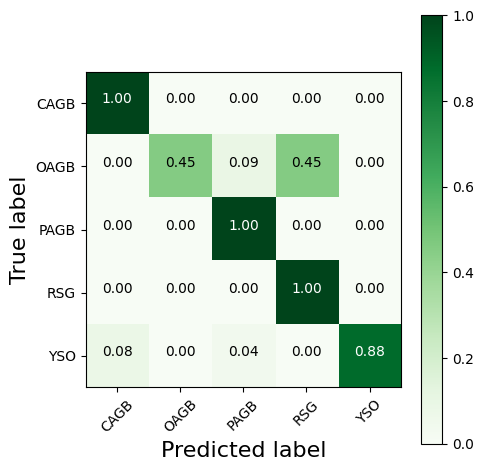

In [ ]:
plot_confusion_matrix(cm = cm ,
                      normalize    = True,
                      target_names = ['CAGB', 'OAGB', 'PAGB', 'RSG', 'YSO'] ,
                      title  = None,
                      file_name = model_name +'_CM.jpg',
                      size = (5,5),
                      color_bar=True)

In [ ]:
%%time
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
SVC = SVC()
par = [
       { 'kernel': ['linear', 'rbf'] ,
         'gamma' : list(np.arange(0.2 , 2 , 0.2 )) + ['scale','auto'] ,
         'C': list(np.arange(0.1 , 0.5 , 0.1 ))
        }
       ]
GS = GridSearchCV(SVC, param_grid=par, cv = 4 , scoring=None)
GS.fit(X_train, Y_train)

CPU times: user 7.27 s, sys: 1.19 ms, total: 7.27 s
Wall time: 9.68 s


GridSearchCV(cv=4, estimator=SVC(),
             param_grid=[{'C': [0.1, 0.2, 0.30000000000000004, 0.4],
                          'gamma': [0.2, 0.4, 0.6000000000000001, 0.8, 1.0, 1.2,
                                    1.4000000000000001, 1.6, 1.8, 'scale',
                                    'auto'],
                          'kernel': ['linear', 'rbf']}])

In [ ]:
print(GS.best_score_)
print(GS.best_params_)

0.8472930674704383
{'C': 0.4, 'gamma': 'scale', 'kernel': 'rbf'}


In [ ]:
from sklearn.svm import SVC
SV_model = SVC(kernel='rbf', C= 0.4, gamma = 'scale' )
SV_model.fit(X_train, Y_train)
Y_pred = SV_model.predict(X_test)

print(classification_report( Y_test , Y_pred ))

              precision    recall  f1-score   support

           0       0.88      0.78      0.82        18
           1       0.44      0.36      0.40        11
           2       0.17      1.00      0.29         1
           3       0.64      0.88      0.74         8
           4       1.00      0.83      0.91        24

    accuracy                           0.74        62
   macro avg       0.62      0.77      0.63        62
weighted avg       0.80      0.74      0.76        62



In [ ]:
import pickle
model_name = 'SVC-S-rbf-74-0'
filename = model_name + '.sav'
pickle.dump(SV_model, open(filename, 'wb'))

In [ ]:
loaded_model = pickle.load(open(filename, 'rb'))
Y_pred_save_model = loaded_model.predict(X_test)

In [ ]:
print(classification_report( Y_test , Y_pred_save_model ))
cm = confusion_matrix(Y_test , Y_pred_save_model )

              precision    recall  f1-score   support

           0       0.88      0.78      0.82        18
           1       0.44      0.36      0.40        11
           2       0.17      1.00      0.29         1
           3       0.64      0.88      0.74         8
           4       1.00      0.83      0.91        24

    accuracy                           0.74        62
   macro avg       0.62      0.77      0.63        62
weighted avg       0.80      0.74      0.76        62



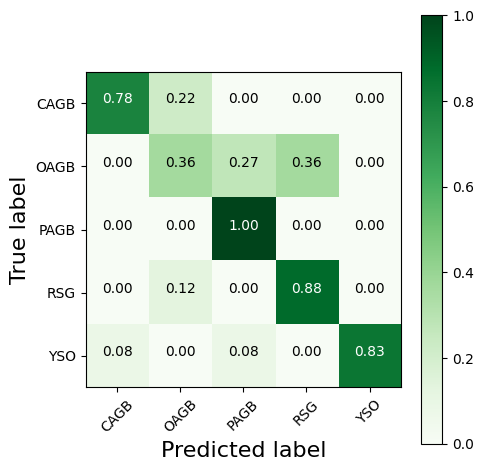

In [ ]:
plot_confusion_matrix(cm = cm ,
                      normalize    = True,
                      target_names = ['CAGB', 'OAGB', 'PAGB', 'RSG', 'YSO'] ,
                      title  = None,
                      file_name = model_name +'_CM.jpg',
                      size = (5,5),
                      color_bar=True)

# GaussianNB

In [ ]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit( X_train , Y_train )
Y_pred = GNB.predict(X_test)

print(classification_report( Y_test , Y_pred ))

              precision    recall  f1-score   support

           0       0.76      0.72      0.74        18
           1       0.46      0.55      0.50        11
           2       0.25      1.00      0.40         1
           3       0.67      0.75      0.71         8
           4       1.00      0.79      0.88        24

    accuracy                           0.73        62
   macro avg       0.63      0.76      0.65        62
weighted avg       0.78      0.73      0.74        62



In [ ]:
import pickle
model_name = 'GNB-S-73-0'
filename = model_name + '.sav'
pickle.dump(GNB, open(filename, 'wb'))

In [ ]:
loaded_model = pickle.load(open(filename, 'rb'))
Y_pred_save_model = loaded_model.predict(X_test)

In [ ]:
print(classification_report( Y_test , Y_pred_save_model ))
cm = confusion_matrix(Y_test , Y_pred_save_model )

              precision    recall  f1-score   support

           0       0.76      0.72      0.74        18
           1       0.46      0.55      0.50        11
           2       0.25      1.00      0.40         1
           3       0.67      0.75      0.71         8
           4       1.00      0.79      0.88        24

    accuracy                           0.73        62
   macro avg       0.63      0.76      0.65        62
weighted avg       0.78      0.73      0.74        62



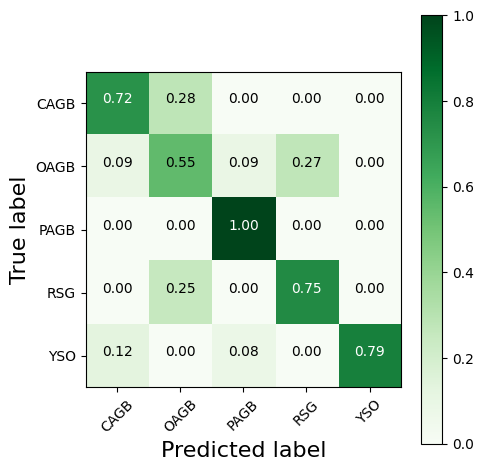

In [ ]:
plot_confusion_matrix(cm = cm ,
                      normalize    = True,
                      target_names = ['CAGB', 'OAGB', 'PAGB', 'RSG', 'YSO'] ,
                      title  = None,
                      file_name = model_name +'_CM.jpg',
                      size = (5,5),
                      color_bar=True)

# MultinomialNB

In [ ]:
from sklearn.naive_bayes import  MultinomialNB

MNB = MultinomialNB()
MNB.fit( X_train, Y_train )
Y_pred = MNB.predict(X_test)

print(classification_report( Y_test , Y_pred ))

              precision    recall  f1-score   support

           0       0.65      0.72      0.68        18
           1       0.40      0.36      0.38        11
           2       0.09      1.00      0.17         1
           3       0.50      0.50      0.50         8
           4       1.00      0.54      0.70        24

    accuracy                           0.56        62
   macro avg       0.53      0.63      0.49        62
weighted avg       0.71      0.56      0.61        62



# KNeighborsClassifier

In [ ]:
%%time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
KNN = KNeighborsClassifier(n_jobs=-1)
par = [
       {
         'n_neighbors' : list(np.arange(2 , 10 , 1 )) ,
         'weights': ['distance' , 'uniform'] ,
          'algorithm' : ['auto','ball_tree', 'kd_tree', 'brute' ]
        }
       ]
GS = GridSearchCV(KNN, param_grid=par, cv = 4, scoring = None)
GS.fit(X_train, Y_train)

CPU times: user 7.77 s, sys: 189 ms, total: 7.96 s
Wall time: 14.6 s


GridSearchCV(cv=4, estimator=KNeighborsClassifier(n_jobs=-1),
             param_grid=[{'algorithm': ['auto', 'ball_tree', 'kd_tree',
                                        'brute'],
                          'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9],
                          'weights': ['distance', 'uniform']}])

In [ ]:
print(GS.best_score_)
print(GS.best_params_)

0.9176230775175824
{'algorithm': 'auto', 'n_neighbors': 2, 'weights': 'distance'}


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier( n_neighbors = 2 , weights= 'distance', n_jobs= 3 )
KNN.fit( X_train , Y_train )
Y_pred = KNN.predict(X_test)

print(classification_report( Y_test , Y_pred ))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        18
           1       0.70      0.64      0.67        11
           2       1.00      1.00      1.00         1
           3       0.64      0.88      0.74         8
           4       1.00      0.88      0.93        24

    accuracy                           0.87        62
   macro avg       0.86      0.88      0.86        62
weighted avg       0.88      0.87      0.87        62



In [ ]:
import pickle
model_name = 'KNN-S-87-0'
filename = model_name + '.sav'
pickle.dump(KNN, open(filename, 'wb'))

In [ ]:
loaded_model = pickle.load(open(filename, 'rb'))
Y_pred_save_model = loaded_model.predict(X_test)

In [ ]:
print(classification_report( Y_test , Y_pred_save_model ))
cm = confusion_matrix(Y_test , Y_pred_save_model )

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        18
           1       0.70      0.64      0.67        11
           2       1.00      1.00      1.00         1
           3       0.64      0.88      0.74         8
           4       1.00      0.88      0.93        24

    accuracy                           0.87        62
   macro avg       0.86      0.88      0.86        62
weighted avg       0.88      0.87      0.87        62



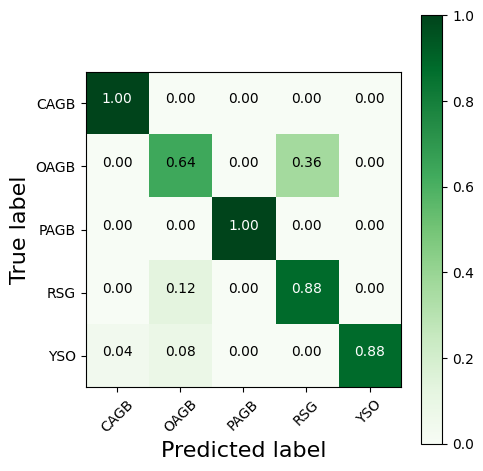

In [ ]:
plot_confusion_matrix(cm = cm ,
                      normalize    = True,
                      target_names = ['CAGB', 'OAGB', 'PAGB', 'RSG', 'YSO'] ,
                      title  = None,
                      file_name = model_name +'_CM.jpg',
                      size = (5,5),
                      color_bar=True)

# Random Forest

In [ ]:
%%time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
RF = RandomForestClassifier(n_jobs=-1, random_state=0)
par = [
       {
         'max_depth' : list(np.arange(1 , 10 , 1 )) ,
         'n_estimators': [10,50,100,1000],
         'criterion' : ['gini', 'entropy', 'log_loss']
        }
       ]
GS = GridSearchCV(RF, param_grid=par, cv = 4, scoring = None)
GS.fit(X, Y)

CPU times: user 7min 33s, sys: 21.3 s, total: 7min 54s
Wall time: 7min 22s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=0),
             param_grid=[{'criterion': ['gini', 'entropy', 'log_loss'],
                          'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                          'n_estimators': [10, 50, 100, 1000]}])

In [ ]:
print(GS.best_score_)
print(GS.best_params_)

0.8204440720569753
{'criterion': 'entropy', 'max_depth': 8, 'n_estimators': 1000}


In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(max_depth=8, random_state=0 , n_estimators=1000 , criterion = 'entropy')
RF.fit( X_train , Y_train )
Y_pred = RF.predict(X_test)

print(classification_report( Y_test , Y_pred ))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        18
           1       0.70      0.64      0.67        11
           2       0.20      1.00      0.33         1
           3       0.70      0.88      0.78         8
           4       1.00      0.79      0.88        24

    accuracy                           0.82        62
   macro avg       0.71      0.85      0.72        62
weighted avg       0.88      0.82      0.84        62



In [ ]:
import pickle
model_name = 'RF-S-8-100-82-0'
filename = model_name + '.sav'
pickle.dump(RF, open(filename, 'wb'))

In [ ]:
loaded_model = pickle.load(open(filename, 'rb'))
Y_pred_save_model = loaded_model.predict(X_test)

In [ ]:
print(classification_report( Y_test , Y_pred_save_model ))
cm = confusion_matrix(Y_test , Y_pred_save_model )

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        18
           1       0.70      0.64      0.67        11
           2       0.20      1.00      0.33         1
           3       0.70      0.88      0.78         8
           4       1.00      0.79      0.88        24

    accuracy                           0.82        62
   macro avg       0.71      0.85      0.72        62
weighted avg       0.88      0.82      0.84        62



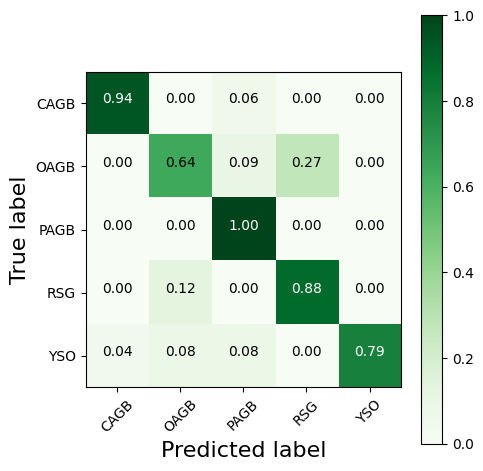

In [ ]:
plot_confusion_matrix(cm = cm ,
                      normalize    = True,
                      target_names = ['CAGB', 'OAGB', 'PAGB', 'RSG', 'YSO'] ,
                      title  = None,
                      file_name = model_name +'_CM.jpg',
                      size = (5,5),
                      color_bar=True)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(max_depth=8, random_state=0 , n_estimators=50 , criterion = 'gini')
RF.fit( X_train , Y_train )
Y_pred = RF.predict(X_test)

print(classification_report( Y_test , Y_pred ))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        18
           1       0.67      0.55      0.60        11
           2       0.20      1.00      0.33         1
           3       0.70      0.88      0.78         8
           4       0.95      0.79      0.86        24

    accuracy                           0.81        62
   macro avg       0.69      0.83      0.70        62
weighted avg       0.85      0.81      0.82        62



In [ ]:
import pickle
model_name = 'RF-S-8-50-81-0'
filename = model_name + '.sav'
pickle.dump(RF, open(filename, 'wb'))

In [ ]:
loaded_model = pickle.load(open(filename, 'rb'))
Y_pred_save_model = loaded_model.predict(X_test)

In [ ]:
print(classification_report( Y_test , Y_pred_save_model ))
cm = confusion_matrix(Y_test , Y_pred_save_model )

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        18
           1       0.67      0.55      0.60        11
           2       0.20      1.00      0.33         1
           3       0.70      0.88      0.78         8
           4       0.95      0.79      0.86        24

    accuracy                           0.81        62
   macro avg       0.69      0.83      0.70        62
weighted avg       0.85      0.81      0.82        62



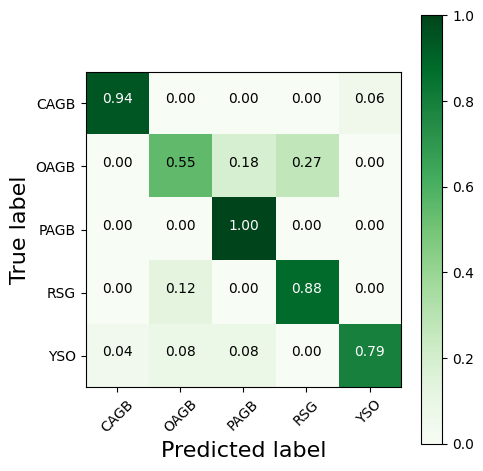

In [ ]:
plot_confusion_matrix(cm = cm ,
                      normalize    = True,
                      target_names = ['CAGB', 'OAGB', 'PAGB', 'RSG', 'YSO'] ,
                      title  = None,
                      file_name = model_name +'_CM.jpg',
                      size = (5,5),
                      color_bar=True)

**Feature importances**

In [ ]:
import time
import numpy as np

start_time = time.time()
importances = RF.feature_importances_
std = np.std([tree.feature_importances_ for tree in RF.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.007 seconds


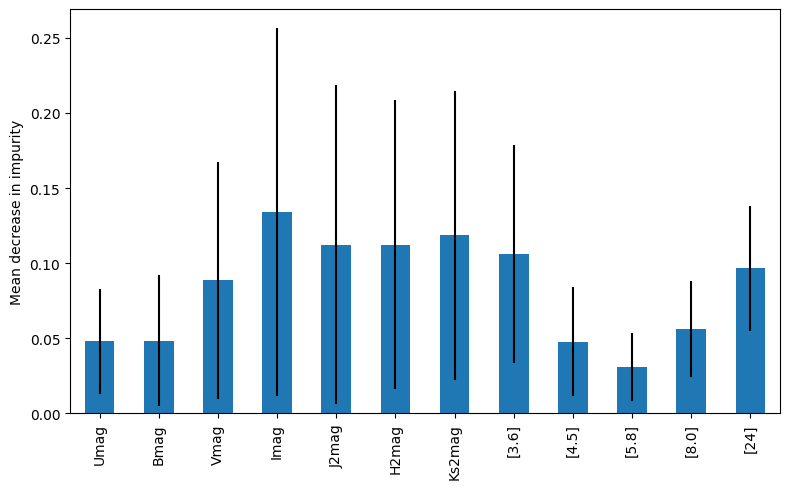

In [ ]:
feature_names = df.columns[2:-2]
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots(figsize=(8,5))
forest_importances.plot.bar(yerr=std, ax=ax)
#ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
fig.savefig('feature_importance_Smote.pdf',dpi=400)

# DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(criterion='entropy', max_depth=4,\
                             min_samples_split=10, min_samples_leaf=3, random_state=2)
DTC.fit( X_train , Y_train )
Y_pred = DTC.predict(X_test)

print(classification_report( Y_test , Y_pred ))

              precision    recall  f1-score   support

           0       0.94      0.76      0.84        21
           1       0.86      0.92      0.89        13
           2       0.15      0.67      0.25         3
           3       1.00      1.00      1.00         6
           4       0.82      0.50      0.62        18

    accuracy                           0.74        61
   macro avg       0.75      0.77      0.72        61
weighted avg       0.85      0.74      0.77        61

